In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Initializing the variables
x=1
dx=0.25
nx=5

nt=1001
dt=0.06

# alpha = 10**-6
# lamda = alpha*dt/dx**2
# print(lamda)
# H = 100
# Ta = 15

T_init=[0, 18.75, 25, 18.75, 0]
xarr=np.linspace(0,x,nx)
print(xarr)

[0.   0.25 0.5  0.75 1.  ]


In [28]:
#Boundary conditions
# Tleft=100
# Tright=100
# T_init[0]=Tleft
# T_init[-1]=Tright
# print(T_init)

In [29]:
#Implicit numerical solution using TDMA

#Lower Diagonal matrix
a=[-1]*2

#Middle Diagonal matrix
b=[4]*3

#Upper Diagonal Matrix
c=[-1]*2

#Right hand side of the system
d=[25, 37.5, 25]

print(a, b, c, d)

[-1, -1] [4, 4, 4] [-1, -1] [25, 37.5, 25]


Iteration:  1
[10 18 13]


Iteration:  250
[20 36 26]


Iteration:  500
[20 36 26]


Iteration:  750
[20 36 26]


Iteration:  1000
[20 36 26]




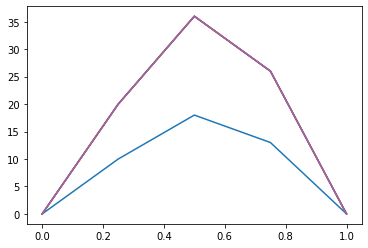

In [30]:
# def TDMAAlgo(a,b,c,d):
#     n = len(d)
#     w = np.zeros(n-1,float)
#     g = np.zeros(n, float)
#     p = np.zeros(n,float)

#     w[0] = c[0]/b[0]
#     g[0] = d[0]/b[0]

#     for i in range(1,n-1):
#         w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
#     for i in range(1,n):
#         g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
#     p[n-1] = g[n-1]
#     for i in range(n-1,0,-1):
#         p[i-1] = g[i-1] - w[i-1]*p[i]
#     return p

def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

#coeff = 2*(1-lamda)
#labels = {1: "At t=0.1s", 2: "At t=0.2s", 3: "At t=0.3s", 4: "At t=0.4s", 5: "At t=0.5s", 6: "At t=0.6s", 7: "At t=0.7s", 8: "At t=0.8s", 9: "At t=0.9s", 10: "At t=1.0s"}
for it in range(1, nt+1):
    T_comp=TDMAsolver(a,b,c,d)
    d = [T_comp[0] + 25, T_comp[1] + 37.5, T_comp[2] + 25]
    if it%250==0 or it==1:
        print("Iteration: ", it)
        print(T_comp)
        print("\n")
        to_plot = [0] + list(T_comp) + [0]
        plt.plot(xarr, to_plot)